In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from datetime import timedelta, datetime
#import holidays

import matplotlib
import pickle
import seaborn as sns

import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objs as go

matplotlib.pyplot.style.use('ggplot')
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.6f' % x)
pd.set_option('display.width', 500)

In [2]:
df_nan = pd.read_csv('../data/train_economic_class/df_nan.csv')

In [3]:
df_nan.shape

(25735, 29)

In [4]:
df_nan['target_class'] = np.where(round(df_nan['log_TARGET'], 1) <= -29.9, 1, 0) # class 1 means TARGET is 0.0 

In [5]:
df_nan_reg = df_nan[df_nan['target_class'] == 0]

In [6]:
df_nan_reg.shape

(1050, 30)

In [7]:
df_nan_reg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1050 entries, 44 to 25702
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      1050 non-null   int64  
 1   TARGET                  1050 non-null   float64
 2   open_year               1050 non-null   int64  
 3   open_month              1050 non-null   int64  
 4   first_prediction        0 non-null      float64
 5   log_first_prediction    0 non-null      float64
 6   economic_class          1050 non-null   object 
 7   log_TARGET              1050 non-null   float64
 8   Retention_count_D0_3    1050 non-null   int64  
 9   Retention_count_D4_7    1050 non-null   int64  
 10  Retention_count_D8_11   1050 non-null   int64  
 11  Retention_count_D12_15  1050 non-null   int64  
 12  Avg_Lvl_Count_D0_3      1050 non-null   float64
 13  Avg_Lvl_Count_D4_7      1050 non-null   float64
 14  Avg_Lvl_Count_D8_11     1050 non-null   flo

In [8]:
df_nan_reg.describe()

ID      TARGET   open_year  open_month  first_prediction  log_first_prediction  log_TARGET  Retention_count_D0_3  Retention_count_D4_7  Retention_count_D8_11  Retention_count_D12_15  Avg_Lvl_Count_D0_3  Avg_Lvl_Count_D4_7  Avg_Lvl_Count_D8_11  Avg_Lvl_Count_D12_15  Avg_Duration_Lvl0_3  Avg_Duration_Lvl4_7  Avg_Duration_Lvl8_10  Total_AdRevenueD0_3  Total_AdRevenueD4_7  Total_AdRevenueD8_11  Total_AdRevenueD12_15  Total_IAPRevenueD0_3  Total_IAPRevenueD4_7  \
count   1050.000000 1050.000000 1050.000000 1050.000000          0.000000              0.000000 1050.000000           1050.000000           1050.000000            1050.000000             1050.000000         1050.000000         1050.000000          1050.000000           1050.000000          1050.000000          1050.000000           1050.000000          1050.000000          1050.000000           1050.000000            1050.000000           1050.000000           1050.000000   
mean  437393.105714    0.400910 2024.000000    1.962857               NaN                   NaN   -3.997600              2.146667              1.193333               1.060000                0.985714            7.193095            4.104524             3.636190              3.117143           767.410794           111.427143             96.779683             0.084399             0.050422              0.043086               0.042989              0.002476              0.000000   
std   248396.380902    1.933070    0.000000    1.334285               NaN                   NaN    3.075419              1.127443              1.377247               1.359646                1.331150           12.197651            9.893322            10.145070              9.251380          7989.878474           184.109614            124.935824             0.346159             0.222775              0.220443               0.243936              0.080238              0.000000   
min     1337.000000    0.000000 2024.000000    1.000000               NaN                   NaN  -15.474366              1.000000              0.000000               0.000000                0.000000            0.000000            0.000000             0.000000              0.000000             0.000000             0.000000              0.000000             0.000000             0.000000              0.000000               0.000000              0.000000              0.000000   
25%   223255.000000    0.003798 2024.000000    1.000000               NaN                   NaN   -5.573452              1.000000              0.000000               0.000000                0.000000            0.750000            0.000000             0.000000              0.000000            34.333333             0.000000              0.000000             0.000000             0.000000              0.000000               0.000000              0.000000              0.000000   
50%   437769.000000    0.025019 2024.000000    1.000000               NaN                   NaN   -3.688126              2.000000              1.000000               0.000000                0.000000            3.000000            0.000000             0.000000              0.000000            64.333333            90.125000             74.166667             0.000000             0.000000              0.000000               0.000000              0.000000              0.000000   
75%   646932.250000    0.135621 2024.000000    3.000000               NaN                   NaN   -1.997894              3.000000              2.000000               2.000000                2.000000            8.000000            3.937500             2.437500              2.250000           110.000000           157.375000            142.250000             0.021247             0.007248              0.002916               0.002982              0.000000              0.000000   
max   877766.000000   43.283070 2024.000000    5.000000               NaN                   NaN    3.767762              4.000000              4.000000               4.000000   

In [9]:
X_cols = [col for col in df_nan_reg.columns if col not in ['ID', 'open_year', 'open_month', 'economic_class', 'target_class',
                                                           'first_prediction', 'TARGET', 'log_first_prediction']]

In [10]:
df_nan_reg.log_TARGET.describe()

count   1050.000000
mean      -3.997600
std        3.075419
min      -15.474366
25%       -5.573452
50%       -3.688126
75%       -1.997894
max        3.767762
Name: log_TARGET, dtype: float64

<Axes: >

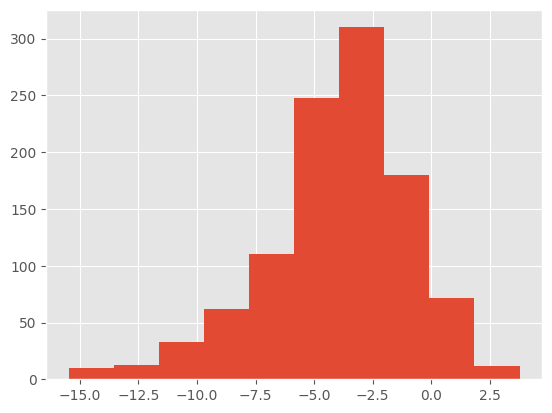

In [11]:
df_nan_reg.log_TARGET.hist()

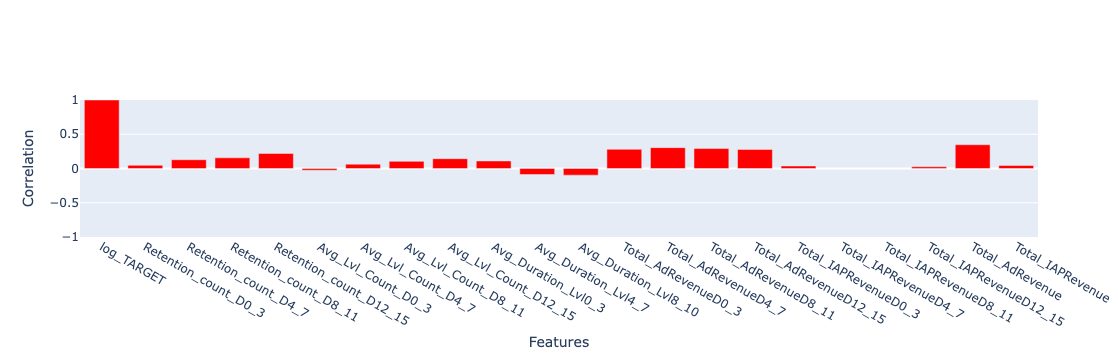

In [12]:
target_corr = df_nan_reg[X_cols].corr()['log_TARGET']

fig = go.Figure([go.Bar(y = target_corr, x = target_corr.index, marker_color = 'red')])

fig.update_layout(xaxis_title = "Features", yaxis_title = "Correlation",
    yaxis = dict(
        range=(-1, 1),
        showticklabels=True
    ))
fig.show()

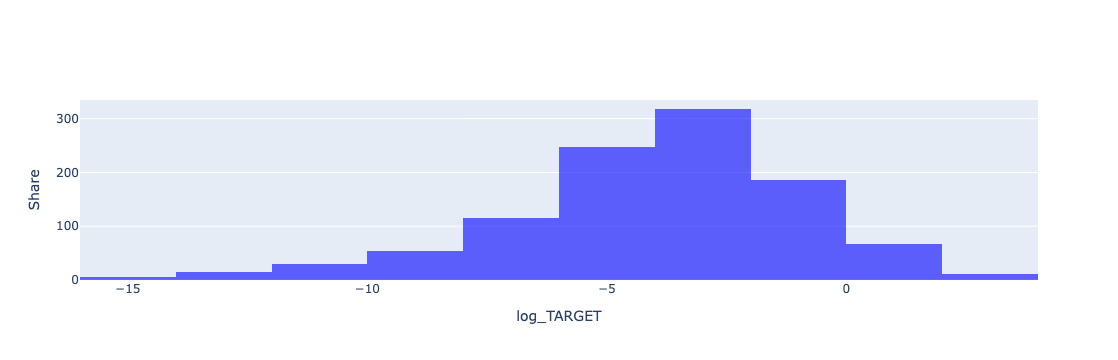

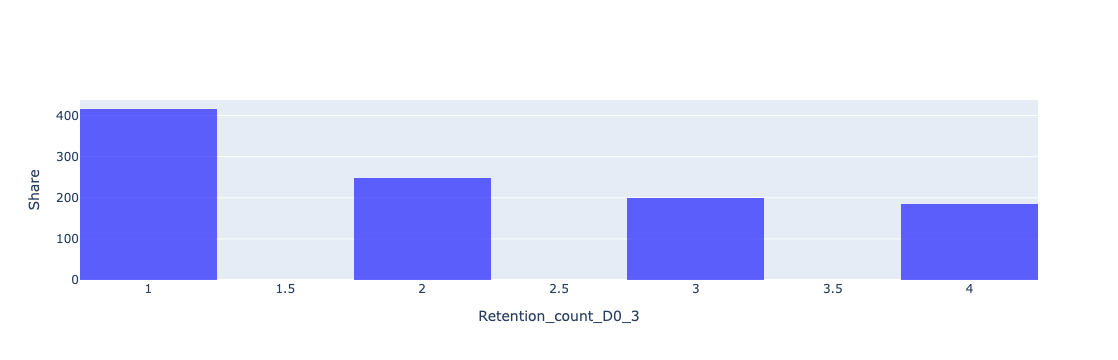

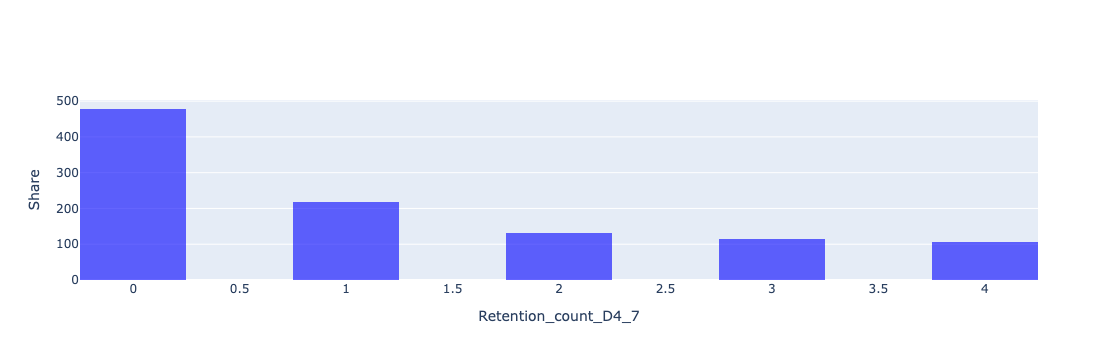

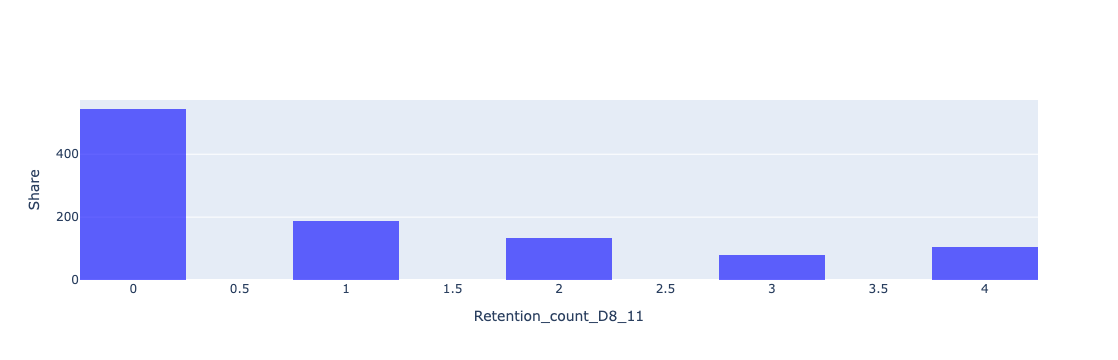

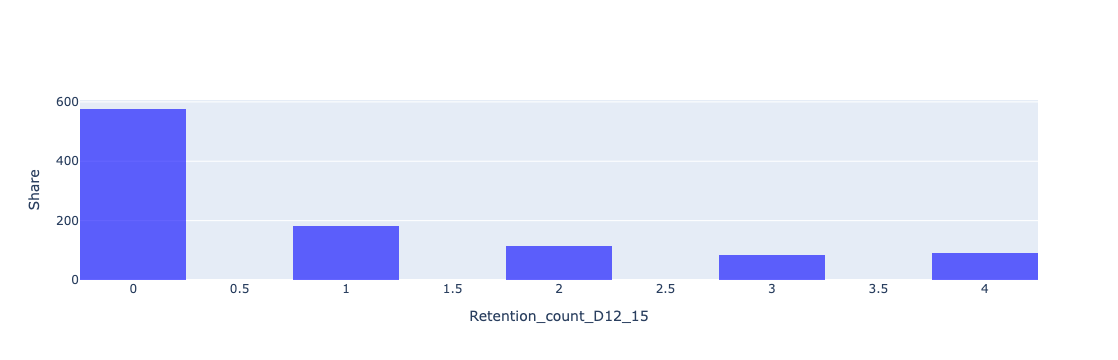

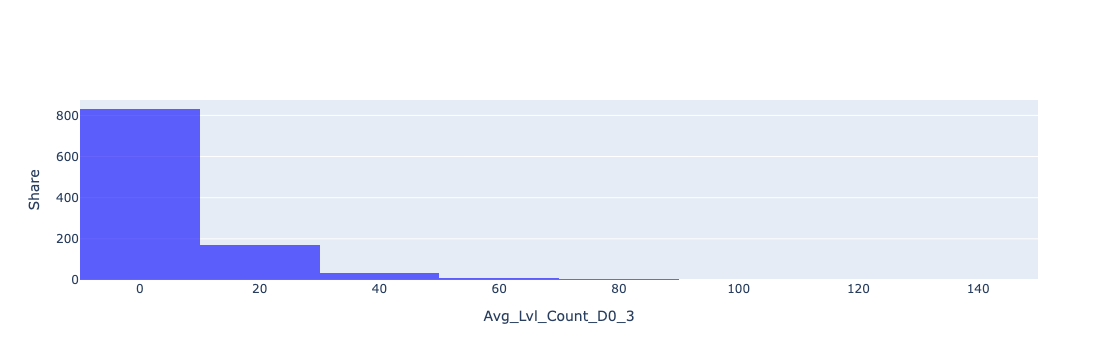

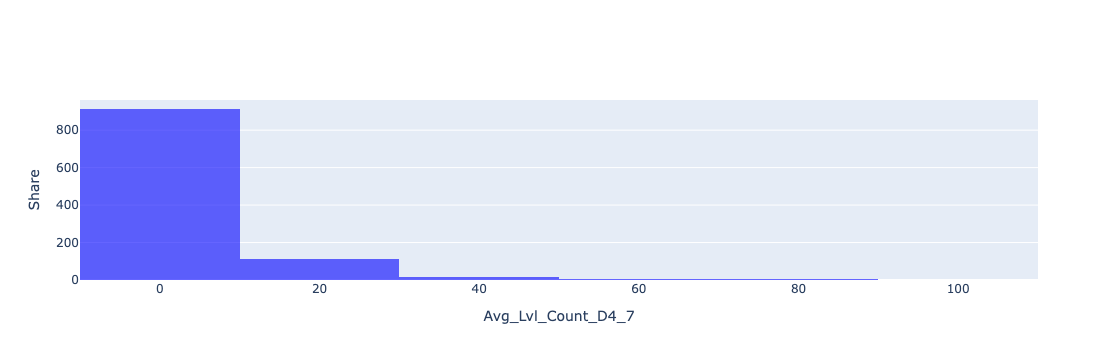

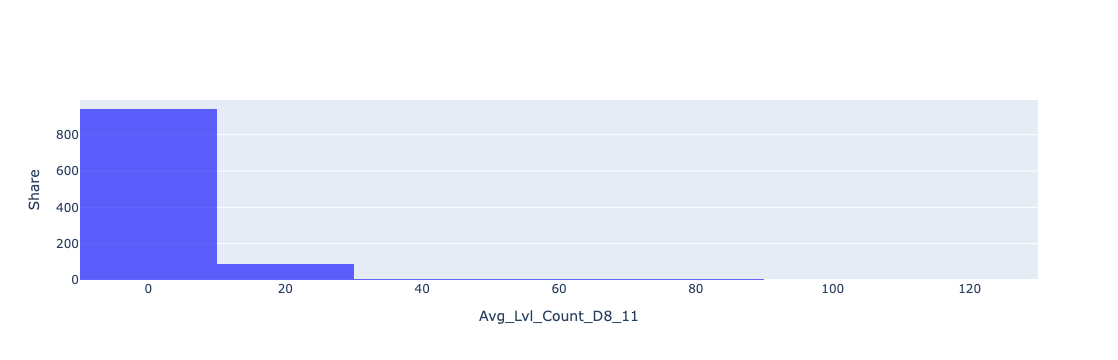

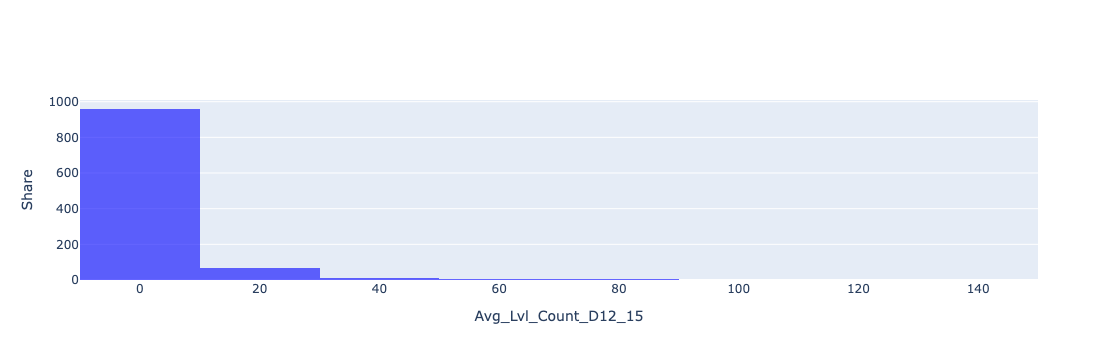

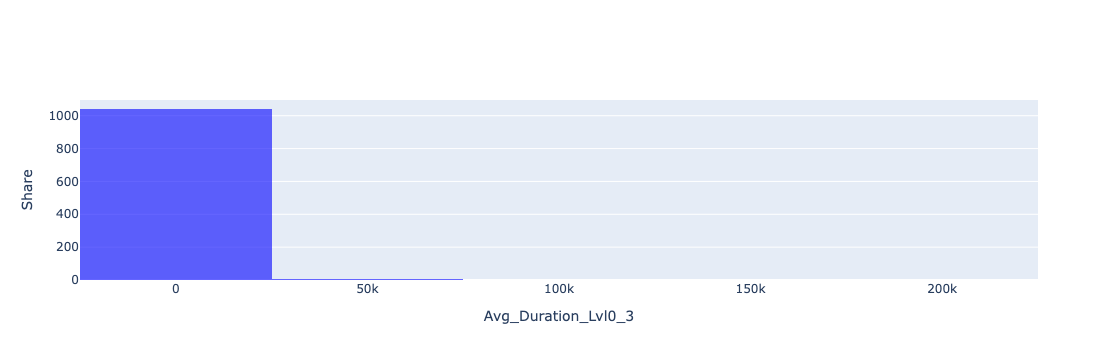

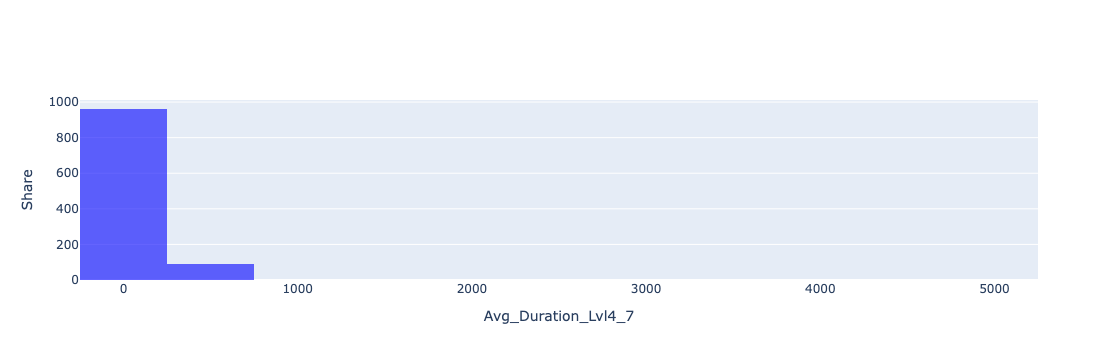

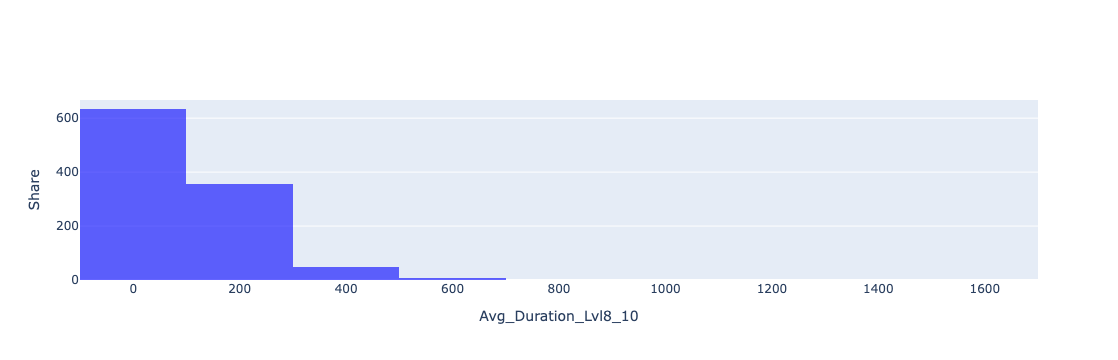

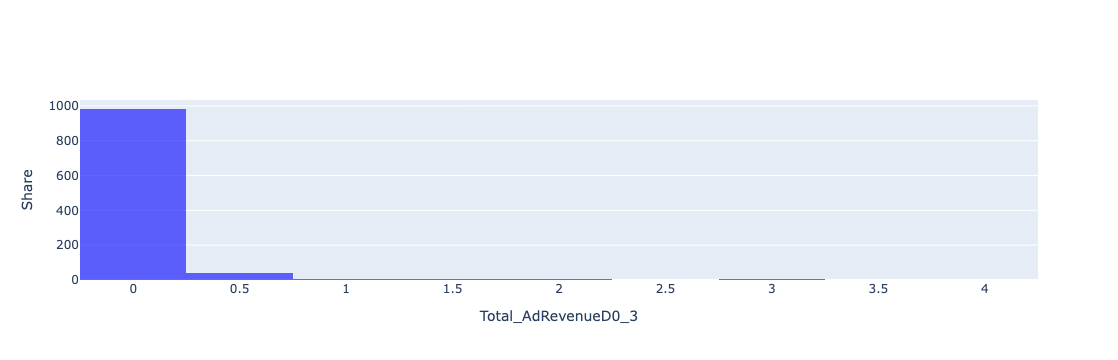

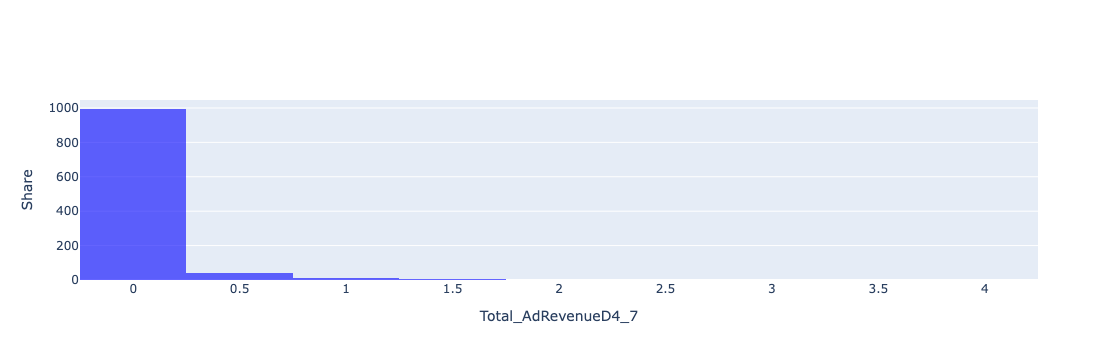

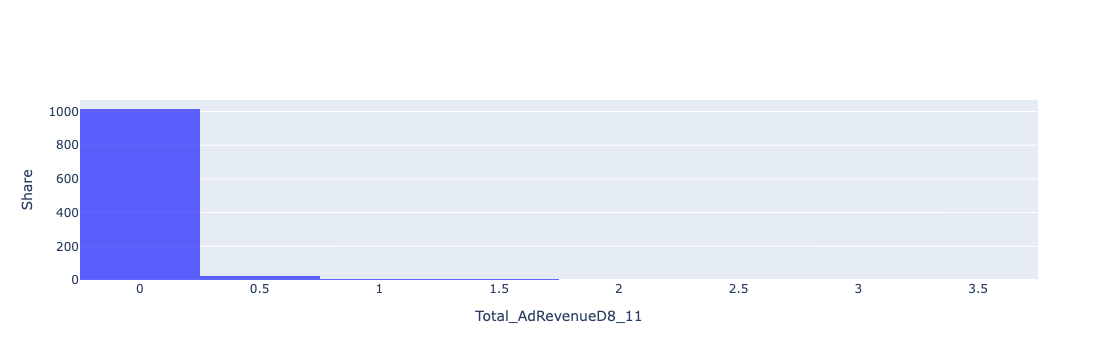

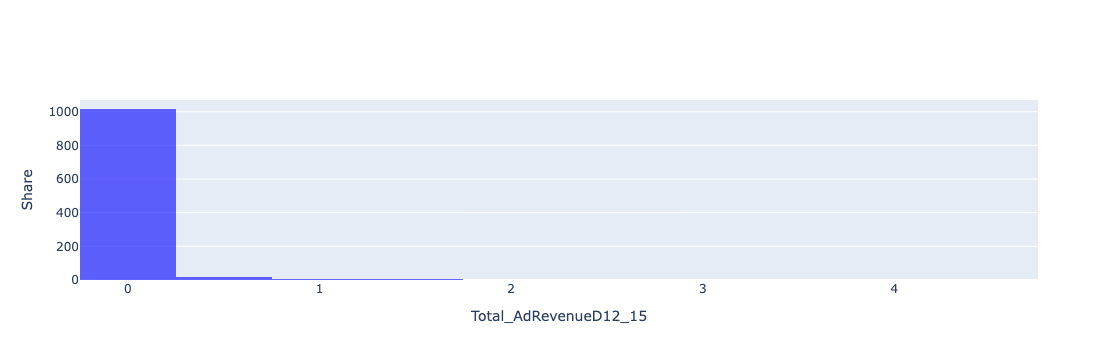

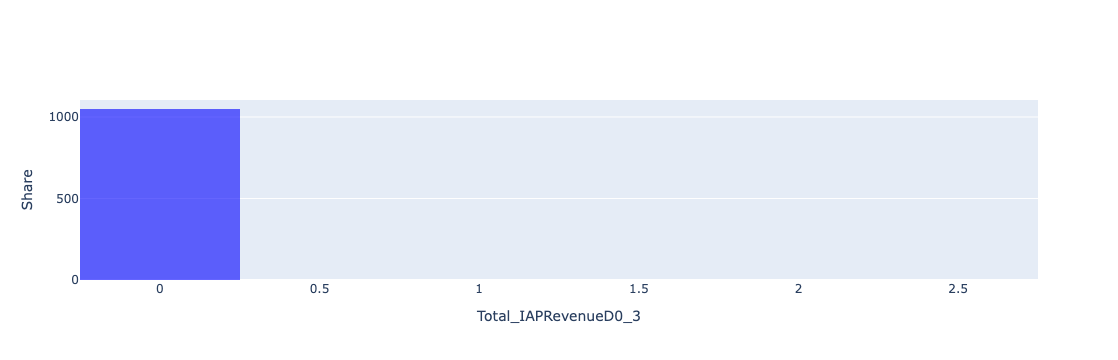

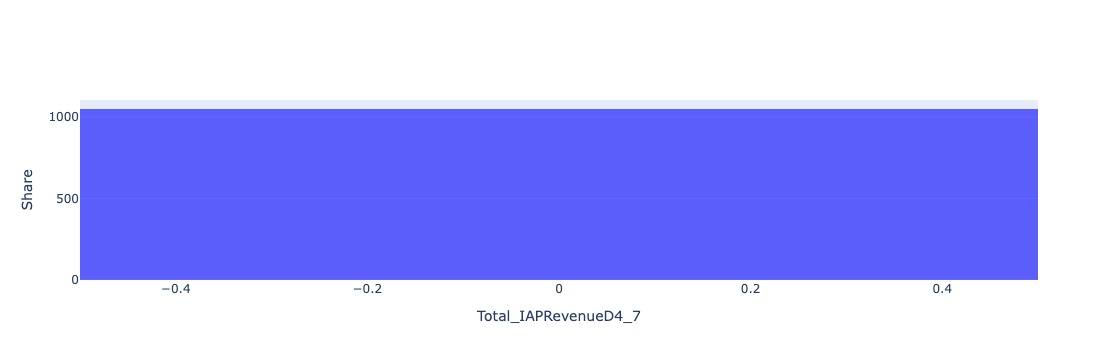

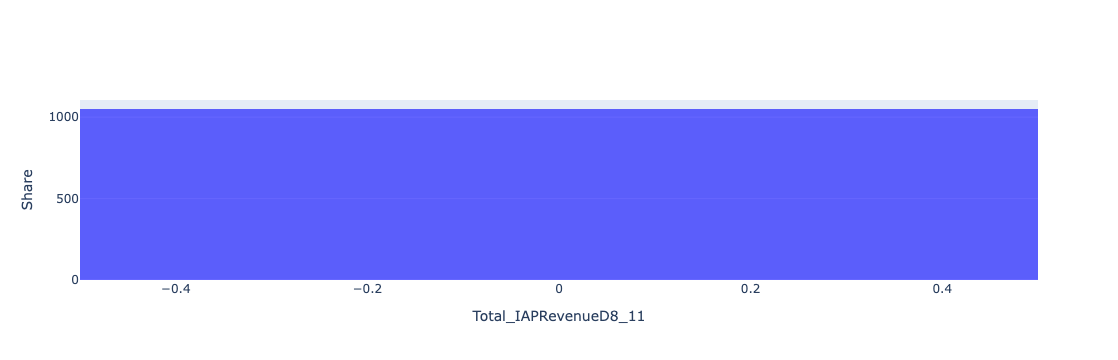

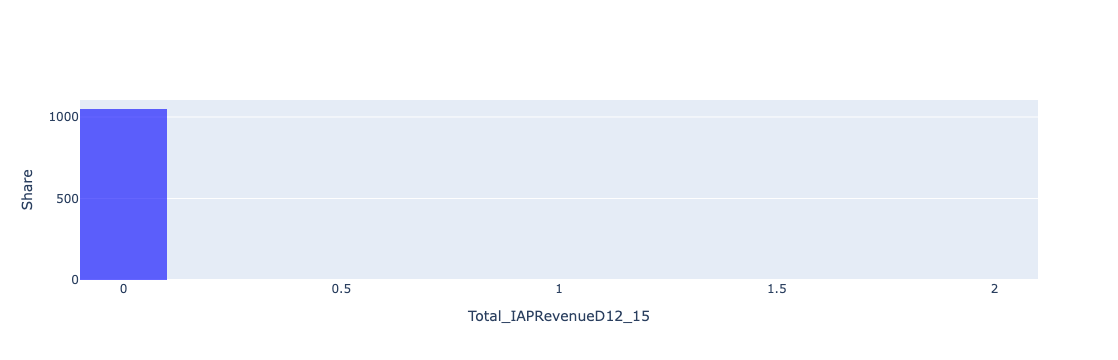

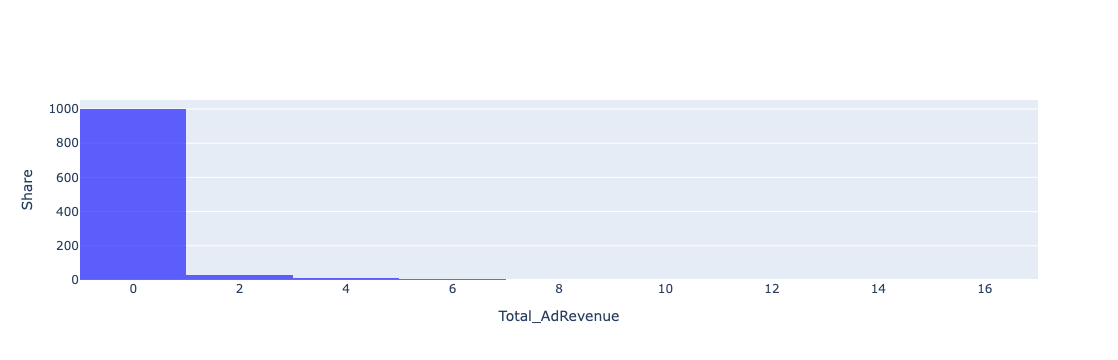

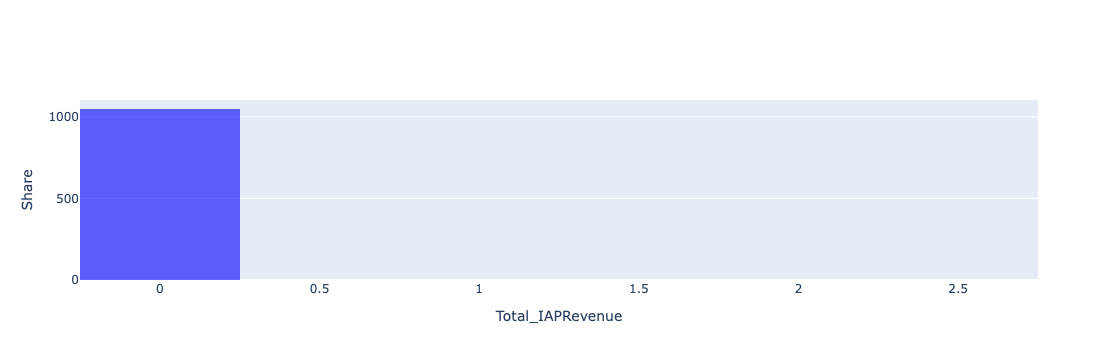

In [13]:
for feature in X_cols:

    fig = go.Figure()
    fig.add_trace(go.Histogram(x = df_nan_reg[feature],
                 marker_color = 'blue', opacity = 0.6, nbinsx = 10))


    fig.update_layout(
        legend = dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
        ),
        xaxis_title = feature,
        yaxis_title = "Share"
    )
    fig.show()

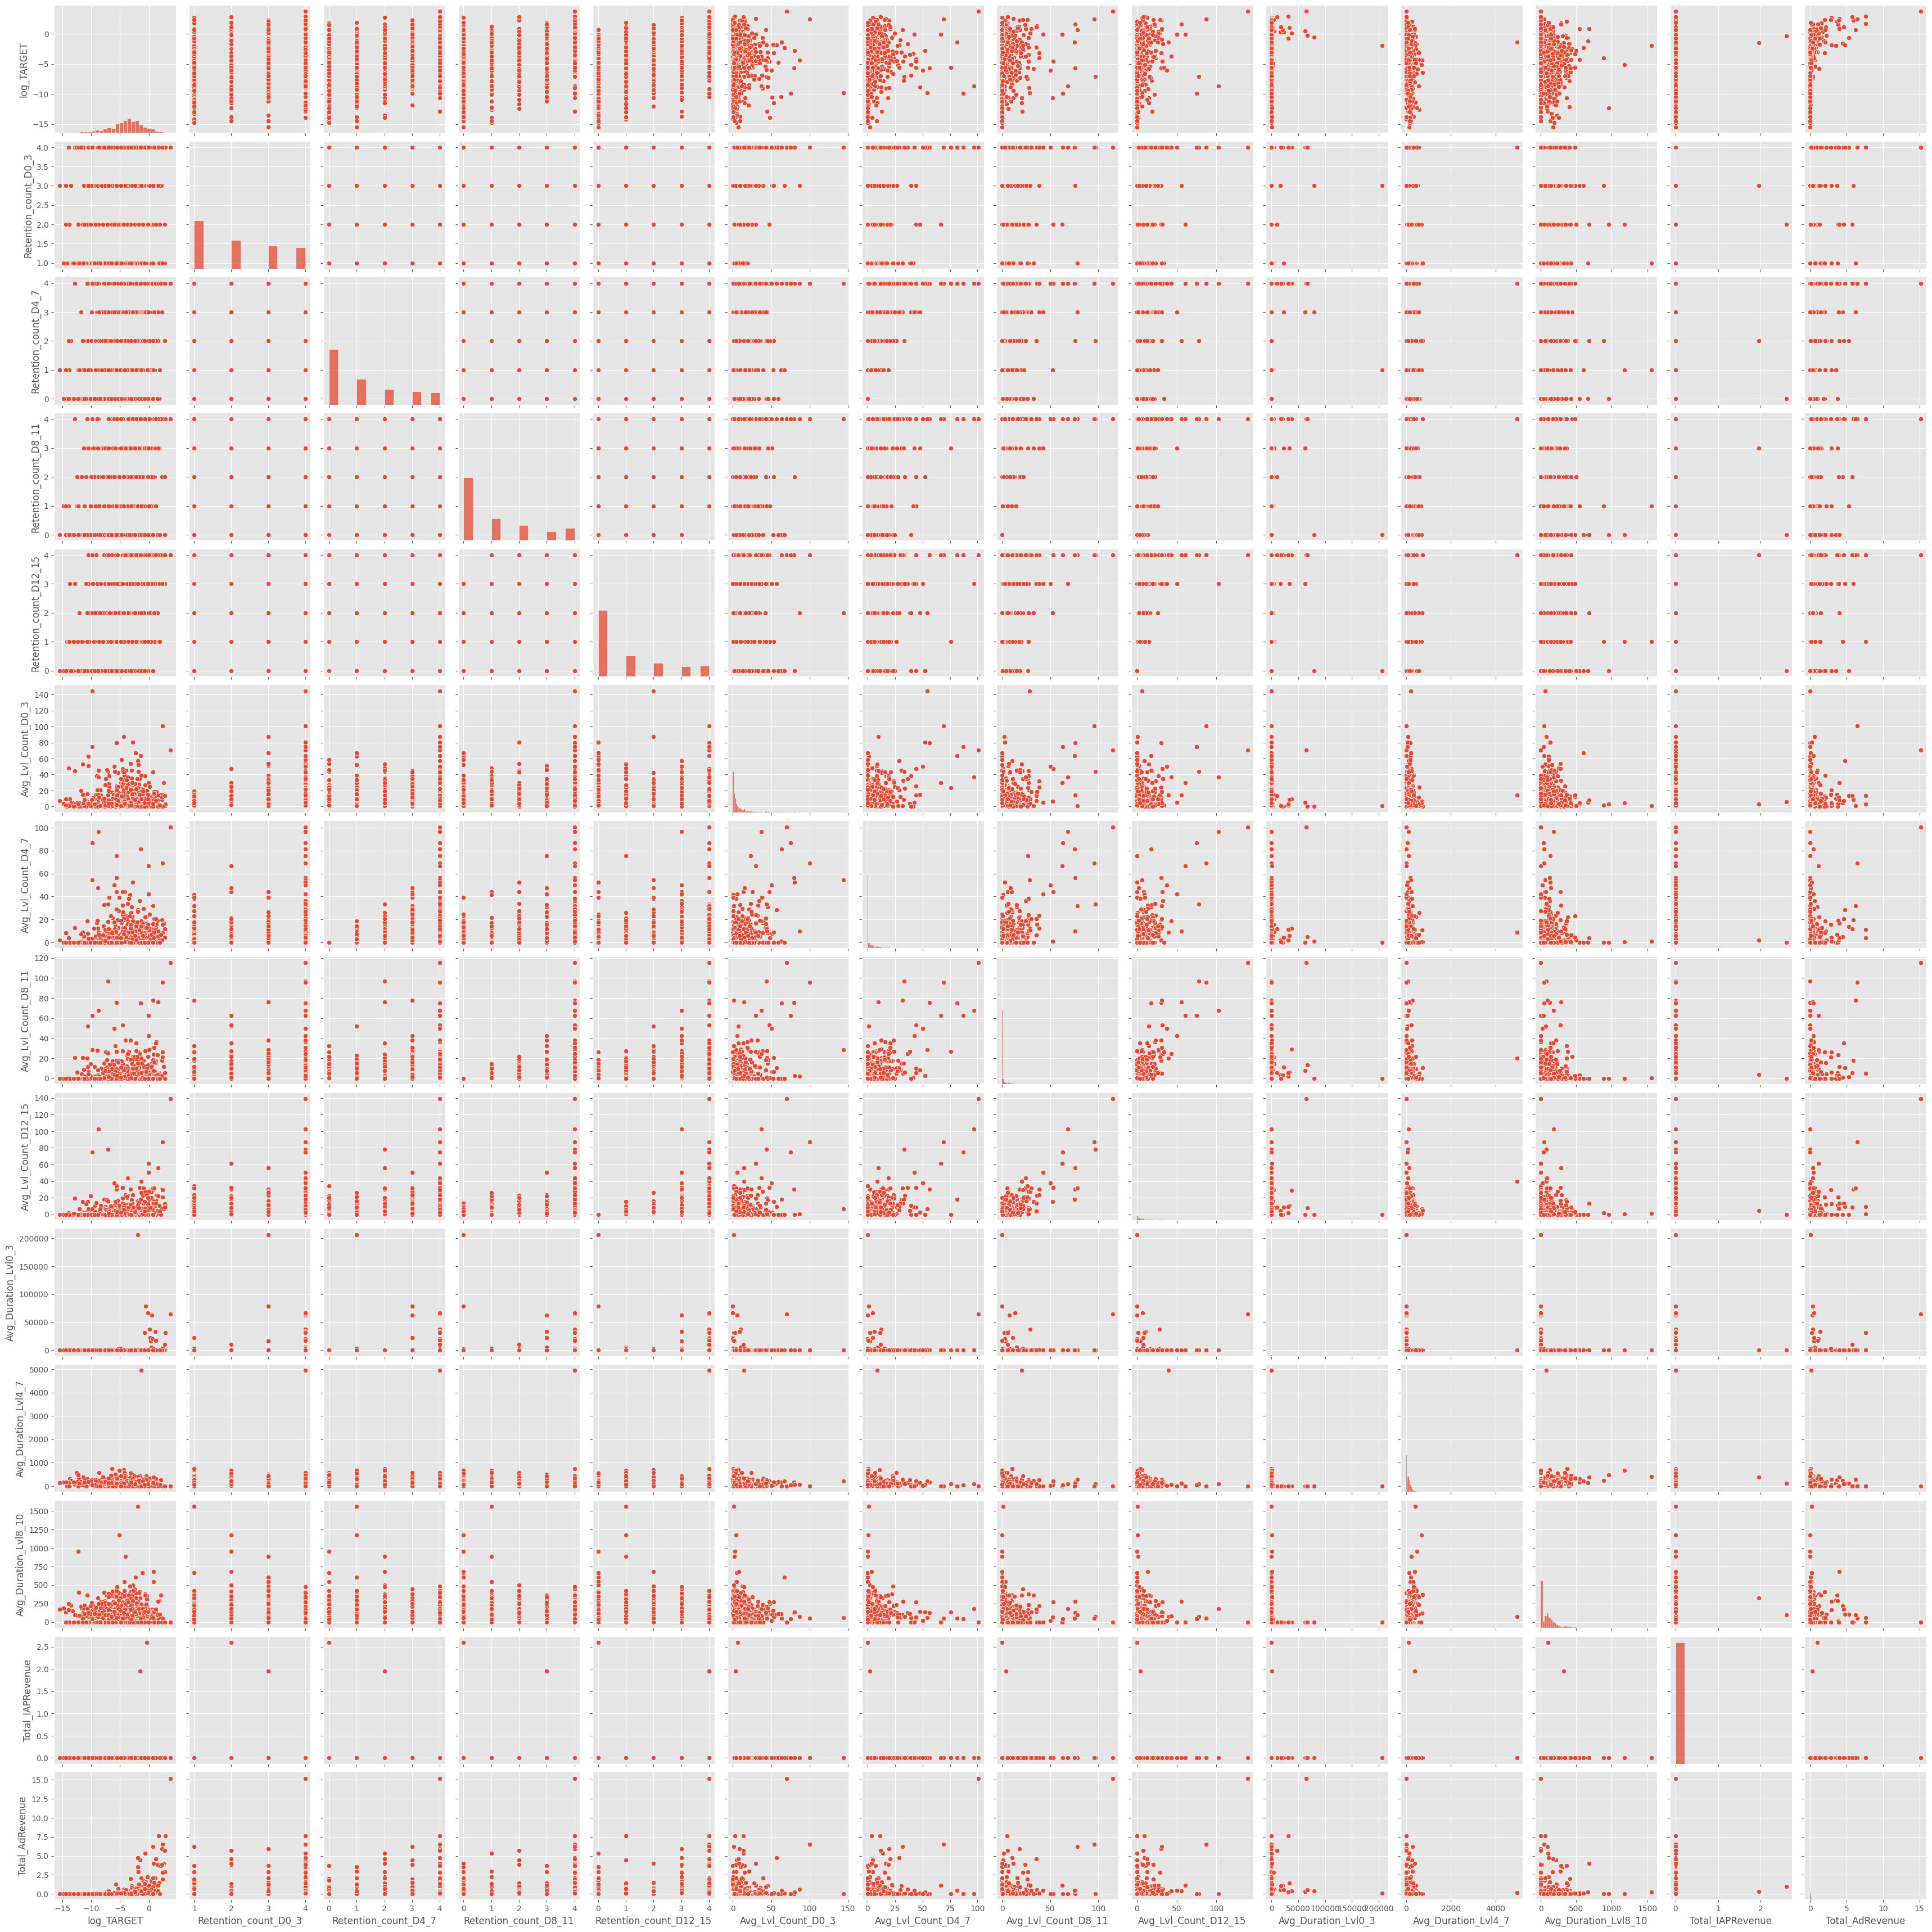

In [15]:
sns.pairplot(df_nan_reg.loc[:,['log_TARGET', 
                    'Retention_count_D0_3', 'Retention_count_D4_7', 'Retention_count_D8_11', 'Retention_count_D12_15',
                      'Avg_Lvl_Count_D0_3', 'Avg_Lvl_Count_D4_7', 'Avg_Lvl_Count_D8_11', 'Avg_Lvl_Count_D12_15',
                     'Avg_Duration_Lvl0_3',	'Avg_Duration_Lvl4_7',	'Avg_Duration_Lvl8_10',
                       'Total_IAPRevenue', 'Total_AdRevenue']])

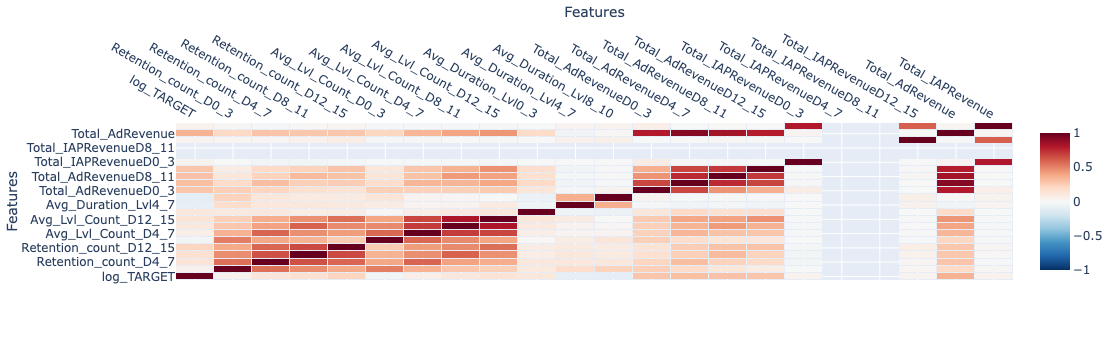

In [16]:
correlation_matrix = df_nan_reg[X_cols].corr()

fig = go.Figure(data=go.Heatmap(
                   z = correlation_matrix,
                   x = correlation_matrix.columns,
                   y = correlation_matrix.index,
                   hoverongaps = False,
                   xgap = 1,
                   ygap = 1,
                   zmin = -1,
                   zmax = 1,
    colorscale = 'rdbu_r'
))

fig.update_xaxes(side="top")
fig.update_layout(xaxis_title = "Features", yaxis_title = "Features")
fig.show()

**Model**

In [17]:
X_cols = ['Retention_count_D0_3', 'Retention_count_D4_7', 'Retention_count_D8_11', 'Retention_count_D12_15',
          'Avg_Lvl_Count_D0_3', 'Avg_Lvl_Count_D4_7', 'Avg_Lvl_Count_D8_11', 'Avg_Lvl_Count_D12_15',
          'Avg_Duration_Lvl0_3',	'Avg_Duration_Lvl4_7',	'Avg_Duration_Lvl8_10',
          'Total_IAPRevenue', 'Total_AdRevenue']

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [19]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [20]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(df_nan_reg[X_cols]), columns=df_nan_reg[X_cols].columns)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, df_nan_reg.log_TARGET, test_size=0.2, random_state=42)

In [22]:
model.fit(X_train, y_train)

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

rmse_test = np.sqrt(mean_squared_error(y_test, test_predictions))
rmse_train = np.sqrt(mean_squared_error(y_train, train_predictions))

In [23]:
print(rmse_test)
print(rmse_train)

2.6939228941815085
1.069600456806533


In [27]:
importances = model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

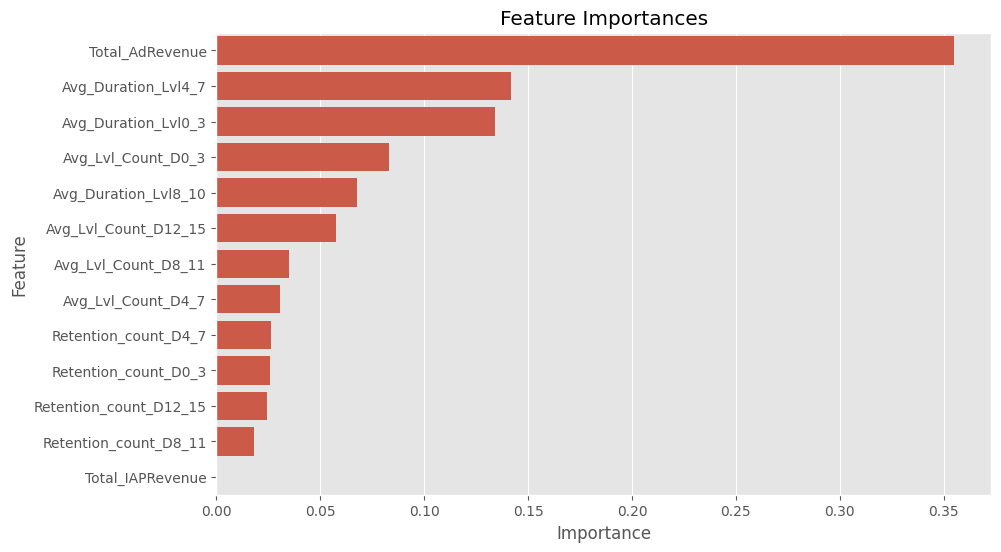

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances')
plt.show()

In [29]:
with open('../models/nan_regressor.pkl', 'wb') as file:
    pickle.dump(model, file)